## 获取数据

In [0]:
from fastai import *
from fastai.collab import *
from fastai.tabular import *

MovieLens是由GroupLens团队创建，用来训练协同过滤模型的数据集。可以下载不同规模的MovieLens数据集来处理。这里我们先尝试一个小数据集：ML_SAMPLE。

In [0]:
path = untar_data(URLs.ML_SAMPLE)
path

PosixPath('/root/.fastai/data/movie_lens_sample')

### 获取dataframe类型数据
csv文件可以用pandas.read_csv()读取，ratings是dataframe类型。

In [0]:

ratings=pd.read_csv(path/'ratings.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,73,1097,4.0,1255504951
1,561,924,3.5,1172695223
2,157,260,3.5,1291598691
3,358,1210,5.0,957481884
4,130,316,2.0,1138999234


### 创建databunch

from_df()从dataframe创建CollabDataBunch；

seed=42是from_df()函数中通过split_by_rand_pct()随机取数据创建验证集时的“种子”

In [0]:
data = CollabDataBunch.from_df(ratings,seed=42)

In [0]:
y_range=[0,5.5]

### 创建collab_learner并训练
传入databunch。


1.   
n_factors表示
2.   列表项
y_range设置了评分的范围，sigmoid函数会渐进y的最大值和最小值，这里设置为0-5.5是为了sigmoid可以输出5，也就是最佳评分。设置输出范围是为了让模型更好地判断哪个用户会喜欢哪个电影。


In [0]:
learn=collab_learner(data,n_factors=50,y_range=y_range)

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


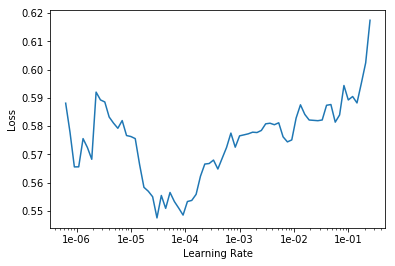

In [0]:
learn.recorder.plot(skip_end=15)

In [0]:
learn.fit_one_cycle(3,5e-4)

epoch,train_loss,valid_loss,time
0,0.574980,0.658317,00:00
1,0.565922,0.655379,00:00
2,0.569177,0.654837,00:00


In [0]:
learn.predict()

NameError: ignored